In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
cp -av '/content/drive/MyDrive/Hybrid/Images' '/content/Images'

'/content/drive/MyDrive/Hybrid/Images/1069.png' -> '/content/Images/Images/1069.png'
'/content/drive/MyDrive/Hybrid/Images/1075.png' -> '/content/Images/Images/1075.png'
'/content/drive/MyDrive/Hybrid/Images/1070.png' -> '/content/Images/Images/1070.png'
'/content/drive/MyDrive/Hybrid/Images/1077.png' -> '/content/Images/Images/1077.png'
'/content/drive/MyDrive/Hybrid/Images/1080.png' -> '/content/Images/Images/1080.png'
'/content/drive/MyDrive/Hybrid/Images/1082.png' -> '/content/Images/Images/1082.png'
'/content/drive/MyDrive/Hybrid/Images/1079.png' -> '/content/Images/Images/1079.png'
'/content/drive/MyDrive/Hybrid/Images/1078.png' -> '/content/Images/Images/1078.png'
'/content/drive/MyDrive/Hybrid/Images/1086.png' -> '/content/Images/Images/1086.png'
'/content/drive/MyDrive/Hybrid/Images/1085.png' -> '/content/Images/Images/1085.png'
'/content/drive/MyDrive/Hybrid/Images/1083.png' -> '/content/Images/Images/1083.png'
'/content/drive/MyDrive/Hybrid/Images/1081.png' -> '/content/Imag

In [20]:
import os
import tensorflow as tf
import json
import pandas as pd
import numpy as np
from PIL import Image

 
image_path = '/content/Images/Images'
annotation_path = '/content/Captions.json'

In [21]:
#infin = 111111111
#target = infin

#file = open(annotation_path,'r',encoding="utf-8")
#text = file.read()
#file.close()
#list1 = list(text)
#list1[target] = ' '
#for x in range(target,infin):
#  if(list1[x]=='"'):
#    list1[x]=' '
#    break
#text=''.join(list1)
#file2 = open(annotation_path,'w',encoding="utf-8")
#file2.write(text)
#file2.close()



In [22]:
images = os.listdir(image_path)
print(f'Total images: {len(images)}')

with open(annotation_path, 'r') as f:
  caption_json = json.load(f)

#Preprocessing annotation from text file to dataframe

img_list = []
caption_list = []
for val in caption_json:
  fileName = val['filename']
  cap = val['caption']
  caption_list.extend(cap[:])
  img_list.extend([fileName] * len(cap))

img_list = np.array(img_list)
caption_list = np.array(caption_list)
img_list = img_list.reshape(-11,1)
caption_list = caption_list.reshape(-1,1)

print(img_list[0],caption_list[0])
dataset = np.concatenate((img_list,caption_list),axis=1)
print(dataset[0])
data = pd.DataFrame(dataset,columns=["filename","caption"])
data = data.reindex(columns =['filename','caption'])
data = data[data.filename != '2258277193_586949ec62.jpg.1']
uni_filenames = np.unique(data.filename.values)

data.head()

Total images: 18013
['1.png'] ['তিন জন মেয়ে মানুষ আছে। এক জন দাড়িয়ে আছে আর দুই জন বসে আছে।']
['1.png' 'তিন জন মেয়ে মানুষ আছে। এক জন দাড়িয়ে আছে আর দুই জন বসে আছে।']


,filename,caption
0,1.png,তিন জন মেয়ে মানুষ আছে। এক জন দাড়িয়ে আছে আর দুই...
1,1.png,একটি হলুদ জামা পায়জামা পরা মহিলা দাড়িয়ে হাতে এ...
2,2.png,অনেক মেয়ে মানুষ বসে আছে।
3,2.png,একটি নীল জামা পরা মহিলা একটি নীল ল্যাপটপ এর দি...
4,3.png,অনেক মানুষ একসাথে বসে কাজ করছে।


['8363.png' 'একজন নারী বসে কাজ করছে।'] ['8363.png'
 'শাড়ি পরা একজন মহিলা একটা গাছের নিচা বসে চালনি দিয়ে চাল চালছে।']


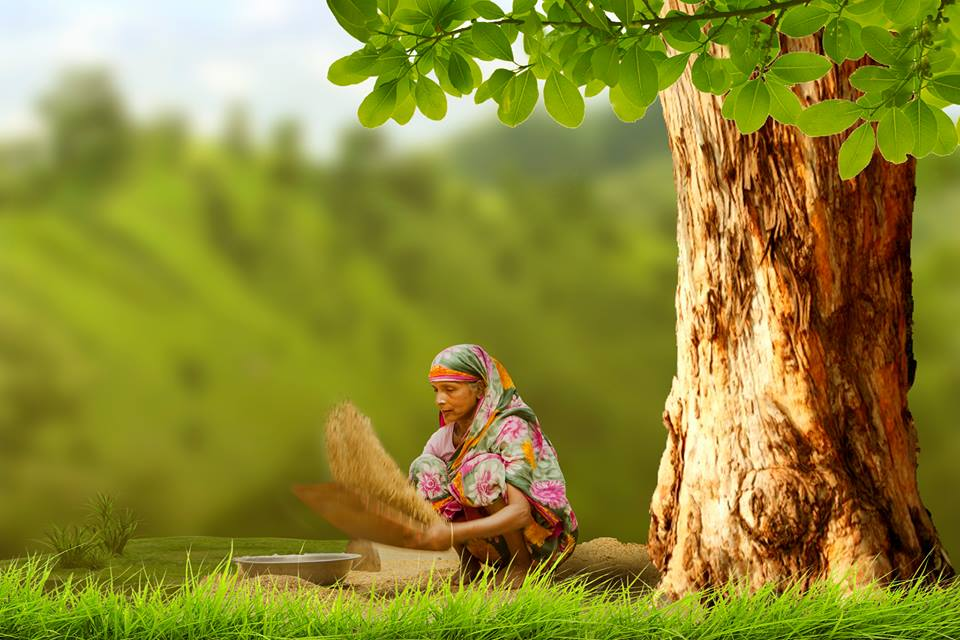

In [23]:
idx = np.random.randint(1,9000)
print(dataset[2*idx],dataset[2*idx+1])
Image.open(image_path+'/'+dataset[2*idx][0])

In [24]:
vocabulary = []
for txt in data.caption.values:
   vocabulary.extend(txt.split())
print(f'Vocabulary Size: {len(set(vocabulary))}' )

Vocabulary Size: 10783


In [25]:
#Add <start> and <end> token to each annotation
all_captions = []
for caption  in data["caption"].astype(str):
   caption = '<start> ' + caption+ ' <end>'
   all_captions.append(caption)

all_captions[:10]

['<start> তিন জন মেয়ে মানুষ আছে। এক জন দাড়িয়ে আছে আর দুই জন বসে আছে। <end>',
 '<start> একটি হলুদ জামা পায়জামা পরা মহিলা দাড়িয়ে হাতে একটি বেত নিয়ে পিটানোর ভাব দেখাচ্ছে আর ছোট একটি মেয়ে পিছনে ব্যাগ নিয়ে বসে কাঁদছে।  <end>',
 '<start> অনেক মেয়ে মানুষ বসে আছে। <end>',
 '<start> একটি নীল জামা পরা মহিলা একটি নীল ল্যাপটপ এর দিকে তাকিয়ে আছে এবং পিছনে  তার দিকে বসে শারি পরে তাকিয়ে আছে অনেকগুলো মহিলা।  <end>',
 '<start> অনেক মানুষ একসাথে বসে কাজ করছে। <end>',
 '<start> ২ টি  ছোট ছেলে একজন শার্ট প্যান্ট  দাড়িয়ে চেয়ে আছে আরেকজন বসে গার্মেন্টস এ কাজ করছে নীল  শার্ট পরে তাদের পিছনে অনেকগুলো মহিলা বসে দাড়িয়ে কাজ করছে।   <end>',
 '<start> ছয় জন মানুষ দাড়িয়ে আছে। <end>',
 '<start> ৬ জন মানুষ এলোমেলো দাড়িয়ে আছে, তাদের মাঝে ২ জন ছেলে ৪ জন পুরুষ,  তাদের একজন লুঙ্গী পরে দাড়িয়ে আছে।  <end>',
 '<start> এক জন মেয়ে মানুষ মাথায় ঘোমটা দিয়ে কাজ করছে। মাটিতে বিভিন্ন রঙের মসলা আছে। <end>',
 '<start> একটি মহিলা হালকা পানির উপরে দাড়িয়ে আছে শারি পরে, মহিলার মুখ ডানদিকে ঘুরানো, পানির রং হলুদ দেখাচ্ছে।  <end>']

In [26]:
#Path for all images
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
all_image_path = []
for image_name in data["filename"]:
   full_image_path = '/content/Images/Images/' + image_name
   all_image_path.append(full_image_path)
all_image_path[:10]

print(f'Total captions data points: images {len(all_image_path)} and captions {len(all_captions)}')

Total captions data points: images 26436 and captions 26436


<start> নদীতে দুটি নৌকা দাড়িয়ে আছে ও নদীতে কচুরি পনা। <end>


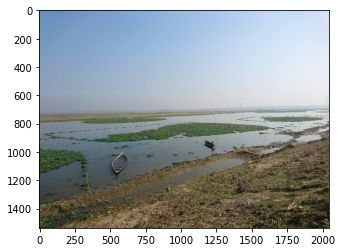

In [27]:
#Limiting data points to 25600 for total batch 400 with 64 batch size

from sklearn.utils import shuffle
def data_limiter(num,total_captions,all_img_name_vector):
   train_captions, img_name_vector = shuffle(total_captions,all_img_name_vector,random_state=1)
   train_captions = train_captions[:num]
   img_name_vector = img_name_vector[:num]
   return train_captions,img_name_vector

train_captions,img_name_vector = data_limiter(25600,all_captions,all_image_path)
import random
index = random.randint(0,25600)
print(train_captions[index])
plt.imshow(load_img(img_name_vector[index]))

In [28]:
# We will use pretrained InceptionV3 for feature extraction
# We must preprocess all the images to the same size, i.e, 299×299 before feeding them into the model,
# and the shape of the output of this layer is 8x8x2048.

def load_image(image_path):
   img = tf.io.read_file(image_path)
   img = tf.image.decode_jpeg(img, channels=3)
   img = tf.image.resize(img, (299, 299))
   img = tf.keras.applications.inception_v3.preprocess_input(img)
   return img, image_path

image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [29]:
# Map load_image with the model input
encode_train = sorted(set(img_name_vector))
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)

In [30]:
# We extract the features and store them in the respective .npy files 
# and then pass those features through the encoder.
# NPY files store all the information required to reconstruct an array on any computer, which includes dtype and shape information.

from tqdm import tqdm

for img, path in tqdm(image_dataset): 
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save((path_of_feature), bf.numpy())

100%|██████████| 207/207 [04:15<00:00,  1.23s/it]


In [31]:
# we tokenize the captions and build a vocabulary of all the unique words in the data. 
# We will also limit the vocabulary size to the top 8192 words to save memory. 
# We will replace words not in vocabulary with the token < unk >

top_k = 8192
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                 oov_token="<unk>",
                                                 filters='!"#$%&()*+.,-/:;=?@[\]_^`{|}~ ')

tokenizer.fit_on_texts(train_captions)
train_seqs = tokenizer.texts_to_sequences(train_captions)
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(train_captions)
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [32]:
img_name_vector_train = img_name_vector[:19200]
cap_vector_train = cap_vector[:19200]
img_name_vector_test = img_name_vector[19201:]
cap_vector_test = cap_vector[19201:]
# Create training and validation sets using an 75-25 split:
from sklearn.model_selection import train_test_split
img_name_train, img_name_val, cap_train, cap_val = train_test_split(img_name_vector_train,cap_vector_train, test_size=0.25, random_state=0)

In [33]:
# Create a tf.data dataset to use for training our model.

BATCH_SIZE = 64
BUFFER_SIZE = 2560
num_steps = len(img_name_train) // BATCH_SIZE

def map_func(img_name, cap):
   img_tensor = np.load(img_name.decode('utf-8')+'.npy')
   return img_tensor, cap

dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))
dataset = dataset.map(lambda item1, item2: tf.numpy_function(map_func, [item1, item2], [tf.float32, tf.int32]),num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
#print(dataset)

In [34]:
# Positional Encoding
def get_angles(pos, i, d_model):
   angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
   return pos * angle_rates

def positional_encoding_1d(position, d_model):
   angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                           np.arange(d_model)[np.newaxis, :],
                           d_model)

   angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
   angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
   pos_encoding = angle_rads[np.newaxis, ...]
   return tf.cast(pos_encoding, dtype=tf.float32)

def positional_encoding_2d(row,col,d_model):
   assert d_model % 2 == 0
   row_pos = np.repeat(np.arange(row),col)[:,np.newaxis]
   col_pos = np.repeat(np.expand_dims(np.arange(col),0),row,axis=0).reshape(-1,1)

   angle_rads_row = get_angles(row_pos,np.arange(d_model//2)[np.newaxis,:],d_model//2)
   angle_rads_col = get_angles(col_pos,np.arange(d_model//2)[np.newaxis,:],d_model//2)

   angle_rads_row[:, 0::2] = np.sin(angle_rads_row[:, 0::2])
   angle_rads_row[:, 1::2] = np.cos(angle_rads_row[:, 1::2])
   angle_rads_col[:, 0::2] = np.sin(angle_rads_col[:, 0::2])
   angle_rads_col[:, 1::2] = np.cos(angle_rads_col[:, 1::2])
   pos_encoding = np.concatenate([angle_rads_row,angle_rads_col],axis=1)[np.newaxis, ...]
   return tf.cast(pos_encoding, dtype=tf.float32)

In [35]:
# Transformer architecture
# Multihead attention

def create_padding_mask(seq):
   seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
   return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

def create_look_ahead_mask(size):
   mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
   return mask  # (seq_len, seq_len)

def scaled_dot_product_attention(q, k, v, mask):
   matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
   dk = tf.cast(tf.shape(k)[-1], tf.float32)
   scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
   if mask is not None:
      scaled_attention_logits += (mask * -1e9) 

   attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1) 
   output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

   return output, attention_weights

class MultiHeadAttention(tf.keras.layers.Layer):
   def __init__(self, d_model, num_heads):
      super(MultiHeadAttention, self).__init__()
      self.num_heads = num_heads
      self.d_model = d_model
      assert d_model % self.num_heads == 0
      self.depth = d_model // self.num_heads
      self.wq = tf.keras.layers.Dense(d_model)
      self.wk = tf.keras.layers.Dense(d_model)
      self.wv = tf.keras.layers.Dense(d_model)
      self.dense = tf.keras.layers.Dense(d_model)

   def split_heads(self, x, batch_size):
      x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
      return tf.transpose(x, perm=[0, 2, 1, 3])

   def call(self, v, k, q, mask=None):
      batch_size = tf.shape(q)[0]
      q = self.wq(q)  # (batch_size, seq_len, d_model)
      k = self.wk(k)  # (batch_size, seq_len, d_model)
      v = self.wv(v)  # (batch_size, seq_len, d_model)

      q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
      k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
      v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

      scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
      scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q,      num_heads, depth)

      concat_attention = tf.reshape(scaled_attention,
                                 (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

      output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
      return output, attention_weights

def point_wise_feed_forward_network(d_model, dff):
   return tf.keras.Sequential([
                tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
                tf.keras.layers.Dense(d_model)])



In [36]:
# Encoder Layer

class EncoderLayer(tf.keras.layers.Layer):
   def __init__(self, d_model, num_heads, dff, rate=0.1):
      super(EncoderLayer, self).__init__()
      self.mha = MultiHeadAttention(d_model, num_heads)
      self.ffn = point_wise_feed_forward_network(d_model, dff)

      self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
      self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

      self.dropout1 = tf.keras.layers.Dropout(rate)
      self.dropout2 = tf.keras.layers.Dropout(rate)


   def call(self, x, training, mask=None):
      attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
      attn_output = self.dropout1(attn_output, training=training)
      out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

      ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
      ffn_output = self.dropout2(ffn_output, training=training)
      out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
      return out2

In [37]:
# Decoder Layer

class DecoderLayer(tf.keras.layers.Layer):
   def __init__(self, d_model, num_heads, dff, rate=0.1):
      super(DecoderLayer, self).__init__()
      self.mha1 = MultiHeadAttention(d_model, num_heads)
      self.mha2 = MultiHeadAttention(d_model, num_heads)

      self.ffn = point_wise_feed_forward_network(d_model, dff)

      self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
      self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
      self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

      self.dropout1 = tf.keras.layers.Dropout(rate)
      self.dropout2 = tf.keras.layers.Dropout(rate)
      self.dropout3 = tf.keras.layers.Dropout(rate)

   def call(self, x, enc_output, training,look_ahead_mask=None, padding_mask=None):
      attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
      attn1 = self.dropout1(attn1, training=training)
      out1 = self.layernorm1(attn1 + x)

      attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask) 
      attn2 = self.dropout2(attn2, training=training)
      out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

      ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
      ffn_output = self.dropout3(ffn_output, training=training)
      out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

      return out3, attn_weights_block1, attn_weights_block2
      

In [38]:
# Encoder
class Encoder(tf.keras.layers.Layer):
   def __init__(self, num_layers, d_model, num_heads, dff, row_size,col_size,rate=0.1):
      super(Encoder, self).__init__()
      self.d_model = d_model
      self.num_layers = num_layers

      self.embedding = tf.keras.layers.Dense(self.d_model,activation='relu')
      self.pos_encoding = positional_encoding_2d(row_size,col_size,self.d_model)

      self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
      self.dropout = tf.keras.layers.Dropout(rate)

   def call(self, x, training, mask=None):
      seq_len = tf.shape(x)[1]
      x = self.embedding(x)  # (batch_size, input_seq_len(H*W), d_model)
      x += self.pos_encoding[:, :seq_len, :]
      x = self.dropout(x, training=training)

      for i in range(self.num_layers):
         x = self.enc_layers[i](x, training, mask)

      return x  # (batch_size, input_seq_len, d_model)

In [39]:
# Decoder
class Decoder(tf.keras.layers.Layer):
   def __init__(self, num_layers,d_model,num_heads,dff, target_vocab_size, maximum_position_encoding,   rate=0.1):
      super(Decoder, self).__init__()
      self.d_model = d_model
      self.num_layers = num_layers

      self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
      self.pos_encoding = positional_encoding_1d(maximum_position_encoding, d_model)

      self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                         for _ in range(num_layers)]
      self.dropout = tf.keras.layers.Dropout(rate)

   def call(self, x, enc_output, training,look_ahead_mask=None, padding_mask=None):
      seq_len = tf.shape(x)[1]
      attention_weights = {}

      x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
      x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
      x += self.pos_encoding[:, :seq_len, :]
      x = self.dropout(x, training=training)

      for i in range(self.num_layers):
         x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                            look_ahead_mask, padding_mask)
         
         attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
         attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

      return x, attention_weights

In [40]:
# Ensemble Transformer
class Transformer(tf.keras.Model):
   def __init__(self, num_layers, d_model, num_heads, dff,row_size,col_size,
              target_vocab_size,max_pos_encoding, rate=0.1):
      super(Transformer, self).__init__()
      self.encoder = Encoder(num_layers, d_model, num_heads, dff,row_size,col_size, rate)
      self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                          target_vocab_size,max_pos_encoding, rate)
      self.final_layer = tf.keras.layers.Dense(target_vocab_size)

   def call(self, inp, tar, training,look_ahead_mask=None,dec_padding_mask=None,enc_padding_mask=None   ):
      enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model      )
      dec_output, attention_weights = self.decoder(
      tar, enc_output, training, look_ahead_mask, dec_padding_mask)
      final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
      return final_output, attention_weights

In [41]:
# Model Hyper paramerters
num_layer = 4
d_model = 512
dff = 2048
num_heads = 8
row_size = 8
col_size = 8
target_vocab_size = top_k + 1
dropout_rate = 0.1

In [42]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
   def __init__(self, d_model, warmup_steps=4000):
      super(CustomSchedule, self).__init__()
      self.d_model = d_model
      self.d_model = tf.cast(self.d_model, tf.float32)
      self.warmup_steps = warmup_steps

   def __call__(self, step):
      arg1 = tf.math.rsqrt(step)
      arg2 = step * (self.warmup_steps ** -1.5)
      return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [43]:
learning_rate = CustomSchedule(d_model)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                    epsilon=1e-9)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
   mask = tf.math.logical_not(tf.math.equal(real, 0))
   loss_ = loss_object(real, pred)
   mask = tf.cast(mask, dtype=loss_.dtype)
   loss_ *= mask
   return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [44]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
transformer = Transformer(num_layer,d_model,num_heads,dff,row_size,col_size,target_vocab_size, max_pos_encoding=target_vocab_size,rate=dropout_rate)

In [46]:
# Model Training

def create_masks_decoder(tar):
   look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
   dec_target_padding_mask = create_padding_mask(tar)
   combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
   return combined_mask

@tf.function
def train_step(img_tensor, tar):
   tar_inp = tar[:, :-1]
   tar_real = tar[:, 1:]
   dec_mask = create_masks_decoder(tar_inp)
   with tf.GradientTape() as tape:
      predictions, _ = transformer(img_tensor, tar_inp,True, dec_mask)
      loss = loss_function(tar_real, predictions)

   gradients = tape.gradient(loss, transformer.trainable_variables)   
   optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
   train_loss(loss)
   train_accuracy(tar_real, predictions)

import time
for epoch in range(30):
   start = time.time()
   train_loss.reset_states()
   train_accuracy.reset_states()
   for (batch, (img_tensor, tar)) in enumerate(dataset):
      train_step(img_tensor, tar)
      if batch % 50 == 0:
         print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(
         epoch + 1, batch, train_loss.result(), train_accuracy.result()))

   print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1,
                                               train_loss.result(),
                                               train_accuracy.result()))
   print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 5.0381 Accuracy 0.0297
Epoch 1 Batch 50 Loss 4.9360 Accuracy 0.0316
Epoch 1 Batch 100 Loss 4.8478 Accuracy 0.0321
Epoch 1 Batch 150 Loss 4.7840 Accuracy 0.0326
Epoch 1 Batch 200 Loss 4.7253 Accuracy 0.0331
Epoch 1 Loss 4.7028 Accuracy 0.0334
Time taken for 1 epoch: 190.4896216392517 secs

Epoch 2 Batch 0 Loss 4.5182 Accuracy 0.0369
Epoch 2 Batch 50 Loss 4.3432 Accuracy 0.0364
Epoch 2 Batch 100 Loss 4.2867 Accuracy 0.0369
Epoch 2 Batch 150 Loss 4.2477 Accuracy 0.0372
Epoch 2 Batch 200 Loss 4.2075 Accuracy 0.0378
Epoch 2 Loss 4.1890 Accuracy 0.0380
Time taken for 1 epoch: 181.08368849754333 secs

Epoch 3 Batch 0 Loss 4.1199 Accuracy 0.0367
Epoch 3 Batch 50 Loss 3.9402 Accuracy 0.0410
Epoch 3 Batch 100 Loss 3.8866 Accuracy 0.0412
Epoch 3 Batch 150 Loss 3.8589 Accuracy 0.0414
Epoch 3 Batch 200 Loss 3.8330 Accuracy 0.0418
Epoch 3 Loss 3.8245 Accuracy 0.0419
Time taken for 1 epoch: 181.32161140441895 secs

Epoch 4 Batch 0 Loss 3.7191 Accuracy 0.0430
Epoch 4 Batch 50 Loss

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
transformer.save_weights('/content/drive/MyDrive/Image_Captioning/cp.ckpt')
os.listdir('/content/drive/MyDrive/Image_Captioning')

['cp.ckpt.data-00000-of-00001', 'cp.ckpt.index', 'checkpoint']

In [49]:
transformer.load_weights('/content/drive/MyDrive/Image_Captioning/cp.ckpt')

In [50]:
#Evaluation
def evaluate(image):
   temp_input = tf.expand_dims(load_image(image)[0], 0)
   img_tensor_val = image_features_extract_model(temp_input)
   img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))
   start_token = tokenizer.word_index['<start>']
   end_token = tokenizer.word_index['<end>']
   decoder_input = [start_token]
   output = tf.expand_dims(decoder_input, 0) #tokens
   result = [] #word list

   for i in range(100):
      dec_mask = create_masks_decoder(output)
      predictions, attention_weights = transformer(img_tensor_val,output,False,dec_mask)
      predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)
      predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
      if predicted_id == end_token:
         return result,tf.squeeze(output, axis=0), attention_weights
      result.append(tokenizer.index_word[int(predicted_id)])
      output = tf.concat([output, predicted_id], axis=-1)

   return result,tf.squeeze(output, axis=0), attention_weights

['একটি', 'শিশু', 'আছে।']


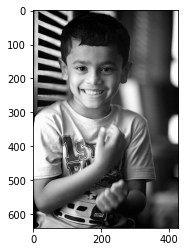

In [51]:
idx = np.random.randint(0,9000);
plt.imshow(load_img(f'/content/Images/Images/{idx}.png'))
caption,result,attention_weights = evaluate(f'/content/Images/Images/{idx}.png')
for i in caption:
   if i=="<unk>":
      caption.remove(i)
print(caption)

6399 6399
<start> একটি ছেলে বন্দুক কাঁধে মাঠের ভিতর দিয়ে হাঁটছে । <end>


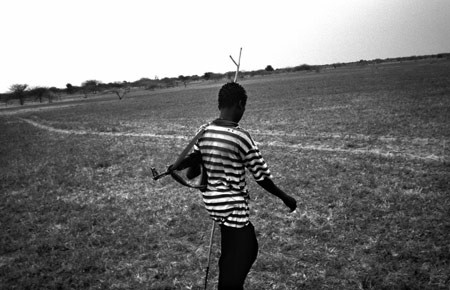

In [52]:
print(len(img_name_vector_test),len(cap_vector_test))
print(' '.join([tokenizer.index_word[i] for i in cap_vector_test[1900] if i not in [0]]))
Image.open(img_name_vector_test[1900])

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

Bleu_1 = 0
Bleu_2 = 0
Bleu_3 = 0
Bleu_4 = 0
for rid in range(0,len(img_name_vector_test)):

  image = img_name_vector_test[rid]
  real_caption = ' '.join([tokenizer.index_word[i] for i in cap_vector_test[rid] if i not in [0]])
  caption,result,attention_weights = evaluate(image)


  first = real_caption.split(' ', 1)[1]
  real_caption = first.rsplit(' ', 1)[0]

  for i in caption:
     if i=="<unk>":
      caption.remove(i)

  for i in real_caption:
     if i=="<unk>":
      real_caption.remove(i)

  result_join = ' '.join(caption)
  result_final = result_join.rsplit(' ', 1)[0]
  real_appn = []
  real_appn.append(real_caption.split())
  reference = real_appn
  candidate = caption

  Bleu_1 += sentence_bleu(reference, candidate,weights=(1,0,0,0))

  Bleu_2 += sentence_bleu(reference, candidate, weights=(0.5,0.5,0,0))
  Bleu_3 += sentence_bleu(reference, candidate, weights=(0.3,0.3,0.3,0))
  Bleu_4 += sentence_bleu(reference, candidate, weights=(0.25,0.25,0.25,0.25))
  #print(f'Blue Scores[1, 2, 3, 4] = {Bleu_1*100/(rid+1)} {Bleu_2*100/(rid+1)} {Bleu_3*100/(rid+1)} {Bleu_4*100/(rid+1)}')

Bleu_1 = Bleu_1*100/len(img_name_vector_test)
Bleu_2 = Bleu_2*100/len(img_name_vector_test)
Bleu_3 = Bleu_3*100/len(img_name_vector_test)
Bleu_4 = Bleu_4*100/len(img_name_vector_test)
print(f'Blue Scores[1, 2, 3, 4] = {Bleu_1} {Bleu_2} {Bleu_3} {Bleu_4}')

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
idx = np.random.randint(0,len(img_list));
plt.imshow(load_img(f'/content/Images/Images/{img_list[idx][0]}'))
caption,result,attention_weights = evaluate(f'/content/Images/Images/{img_list[idx][0]}')
for i in caption:
   if i=="<unk>":
      caption.remove(i)
print('Predicted: ',caption)
print('Actual Caption: ',caption_list[idx][0])